##### Instructions
- Keep the original structure, you may add additional code cells and/or mark-down cells for clarity, legibility and/or structure.
- Add the required descriptions, explanations, justifications to the mark-down cells. You can find more mark-down tips & tricks online, for example [here](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) and [here](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet)

# EXAM03: Data Science Group Assignment - Iteration 1

**Group name:** [Enter Group Number]

**Student names & numbers:**
* [Damian van der Sluis] - []
* [Achraf El Azzouzi] - [101674]
* [Saeed Alhasan] - []


---

## 0. Iteration setup

**Import libraries**

In [32]:
import pandas as pd

**Load dataset(s)**

In [33]:
df = pd.read_csv('ships_inventory_iter1.csv')

---

## 1. Business Understanding
*Rubric: LO 6.4D (Reflection on Process)*

**Situation description**

*Describe the Nebula Brokerage pricing problem. Why is their current "gut feeling" approach a risk?.*

**Business objective(s)**

*Justify why a data-driven baseline is needed*

**Data mining goal(s)**

*Explain what type of modeling task this is and why.*

**Success criteria**

*Determine success criteria for this iteration (the benchmark)*

---

## 2. Data Understanding
*Rubric: LO 7.3Q (Visuals) & LO 6.4C (Process)*

**Data exploration**

*Include summary statistics and descriptions of data types below. Describe your findings.*

# Data Understanding

*Voeg hieronder samenvattende statistieken en beschrijvingen van datatypen toe. Beschrijf je bevindingen.*

De `df.info()`-methode geeft een beknopt overzicht van de DataFrame, inclusief het aantal niet-lege waarden, de datatypen per kolom en het geheugengebruik. Deze informatie is belangrijk om de structuur van de dataset te begrijpen en mogelijke problemen te signaleren, zoals ontbrekende waarden.

De `df.describe()`-methode genereert samenvattende statistieken voor numerieke kolommen, zoals aantal, gemiddelde, standaarddeviatie, minimum, maximum en kwartielen. Deze statistieken helpen om de verdeling en centrale tendensen te begrijpen, wat essentieel is voor verdere analyse en modellering.

De regel `f"Dataset shape: {df.shape[0]} rows and {df.shape[1]} columns"` geeft het aantal rijen (observaties) en kolommen van de dataset weer. Dit helpt om snel de omvang en complexiteit van de dataset te beoordelen.

De regel `df.isnull().sum()` telt per kolom het aantal ontbrekende waarden. Dit helpt om snel te zien in welke variabelen missende data zit en hoe groot het probleem is. Op basis hiervan kunnen we beslissen of imputatie, verwijdering of een andere aanpak nodig is.

In [34]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 368814 entries, 0 to 368813
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Ship_ID            368814 non-null  int64  
 1   Galactic_Credits   368814 non-null  int64  
 2   Model_Cycle        361408 non-null  float64
 3   Ship_Manufacturer  368814 non-null  str    
 4   Sector             368814 non-null  str    
dtypes: float64(1), int64(2), str(2)
memory usage: 14.1 MB


In [35]:
df.describe()

,Ship_ID,Galactic_Credits,Model_Cycle
count,3.688140e+05,368814.000000,361408.000000
mean,7.311485e+09,19453.536818,7511.264529
std,4.381124e+06,15540.472943,9.078571
min,7.301583e+09,501.000000,7400.000000
25%,7.308105e+09,7950.000000,7508.000000
50%,7.312604e+09,15990.000000,7513.000000
75%,7.315245e+09,27990.000000,7517.000000
max,7.317101e+09,777777.000000,7522.000000


In [36]:
f"Dataset shape: {df.shape[0]} rows and {df.shape[1]} columns"

'Dataset shape: 368814 rows and 5 columns'

In [37]:
# Check for missing values
df.isnull().sum()

Ship_ID                 0
Galactic_Credits        0
Model_Cycle          7406
Ship_Manufacturer       0
Sector                  0
dtype: int64

Er ontbreken geen waarden in Ship_ID, Galactic_Credits, Ship_Manufacturer en Sector. Alleen Model_Cycle heeft 7.406 ontbrekende waarden, wat wijst op een datakwaliteitsprobleem specifiek in die kolom.

### **Visualizations and patterns**

*Discover patterns in the data by creating visualizations. Create at least a histogram of Galactic_Credits. Describe your observations.*

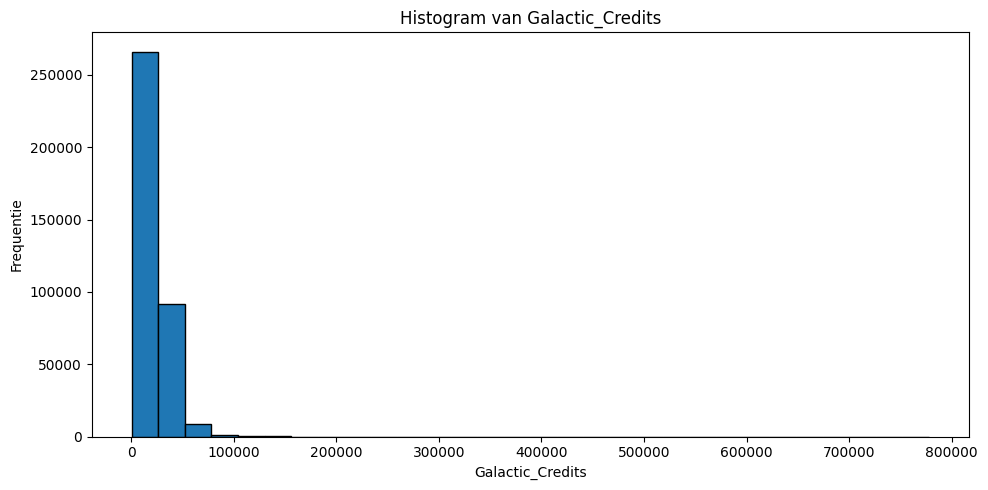

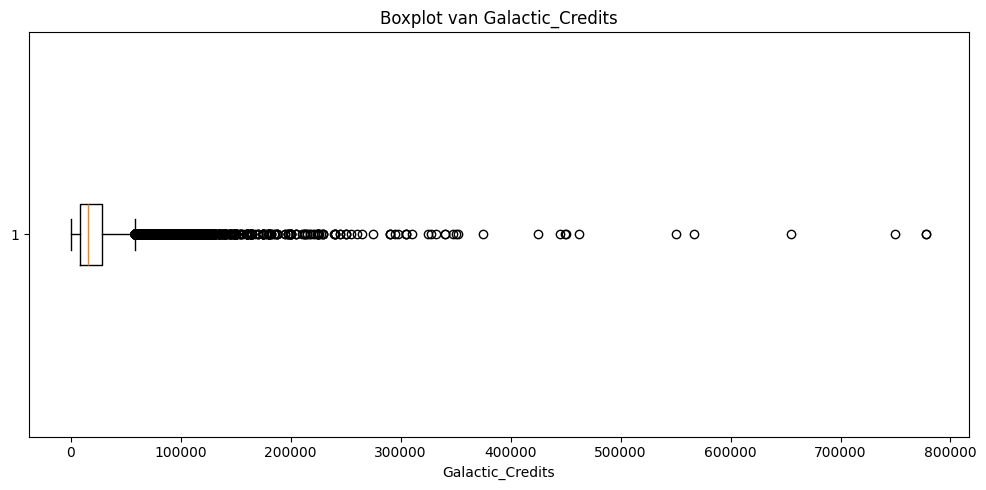

In [38]:
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(10, 5))
plt.hist(df["Galactic_Credits"].dropna(), bins=30, edgecolor="black")
plt.title("Histogram van Galactic_Credits")
plt.xlabel("Galactic_Credits")
plt.ylabel("Frequentie")
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(10, 5))
plt.boxplot(df["Galactic_Credits"].dropna(), vert=False)
plt.title("Boxplot van Galactic_Credits")
plt.xlabel("Galactic_Credits")
plt.tight_layout()
plt.show()

De verdeling van *Galactic_Credits* is sterk rechts‑scheef: de meeste waarden liggen laag, terwijl een klein aantal schepen extreem hoge prijzen heeft. Deze uitschieters trekken de schaal naar rechts en maken de bulk van de data moeilijk zichtbaar in één plot. Dit suggereert dat er enkele zeer dure schepen zijn die niet representatief zijn voor het gemiddelde schip. Daarom is het nuttig om ook een histogram zonder de hoogste waarden te bekijken om de typische prijsverdeling beter te zien.

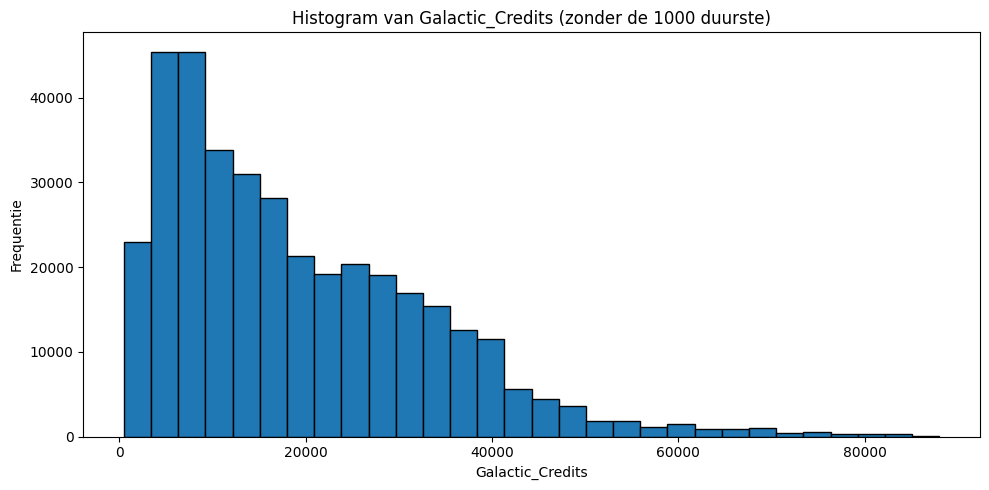

In [39]:
# Histogram zonder top 10 duurste waarden
filtered = df["Galactic_Credits"].dropna()
top1000 = filtered.nlargest(1000).index
filtered_no_top1000 = filtered.drop(index=top1000)

plt.figure(figsize=(10, 5))
plt.hist(filtered_no_top1000, bins=30, edgecolor="black")
plt.title("Histogram van Galactic_Credits (zonder de 1000 duurste)")
plt.xlabel("Galactic_Credits")
plt.ylabel("Frequentie")
plt.tight_layout()
plt.show()

Door de 1000 duurste schepen te verwijderen, wordt de verdeling beter zichtbaar voor het grootste deel van de dataset. De histogram laat nu een duidelijkere **rechts‑scheve** verdeling zien met een langere staart, maar zonder dat extreme uitschieters de schaal domineren. Dit geeft een realistischer beeld van de “typische” prijsklasse en helpt bij het interpreteren van het centrale gedrag.

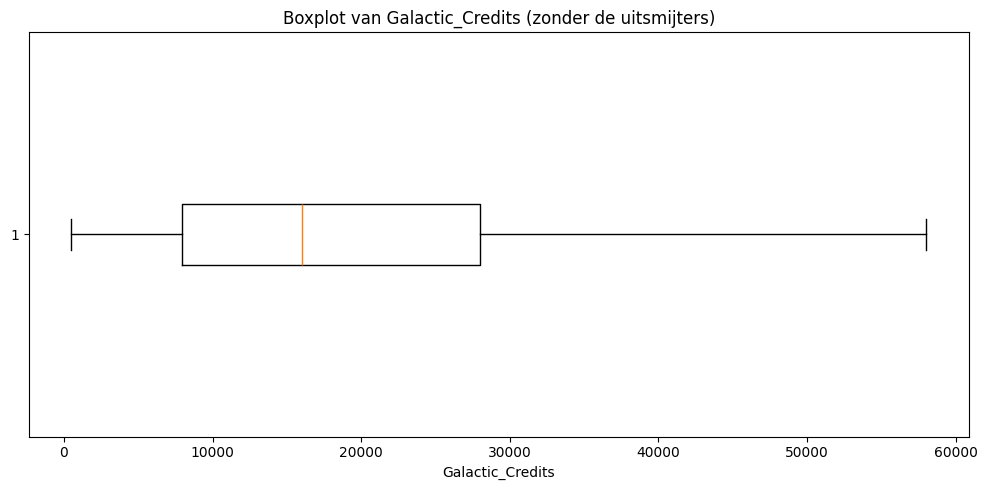

In [40]:
# Boxplot zonder de uitsmijters
plt.figure(figsize=(10, 5))
plt.boxplot(df["Galactic_Credits"].dropna(), vert=False, showfliers=False)
plt.title("Boxplot van Galactic_Credits (zonder de uitsmijters)")
plt.xlabel("Galactic_Credits")
plt.tight_layout()
plt.show()

De boxplot (zonder de uitsmijters) laat een rechts‑scheve verdeling zien: de meeste prijzen liggen relatief laag, de mediaan ligt aan de linkere kant en de rechter whisker is veel langer dan de linker. Dit wijst op een lange staart richting hogere waarden, zelfs na het verwijderen van de top‑uitbijters.

**Data insights and data quality**
* **Insights:** De prijsverdeling van *Galactic_Credits* is sterk rechts‑scheef; de meeste schepen zijn relatief goedkoop en een kleine groep is extreem duur. Dit wijst op een markt met veel standaard‑schepen en enkele high‑end uitschieters.
* **Quality issues:** *Model_Cycle* heeft 7.406 ontbrekende waarden. Andere kolommen hebben geen missende waarden. Er zijn duidelijke uitschieters in *Galactic_Credits* (zeer hoge prijzen).

---

## 3. Data Preparation
*Rubric: LO 6.4C (Data Science Steps)*

**Cleaning and preprocessing**
*Describe and justify steps taken (e.g., imputation, handling outliers, fixing other errors).*

In [41]:
# CODE CELL: Data cleaning and preprocessing steps

**Adjusting dataset (optional)**
*If you adjusted the dataset for modeling in additional ways, describe that here*

In [42]:
# OPTIONAL CODE CELL: Additional preprocessing steps

---

## 4. Modeling
*Rubric: LO 6.4C (Data Science Steps)*

**Model setup**

We gebruiken een **mean baseline model** als benchmark voor het voorspellen van `Galactic_Credits`. Dit model voorspelt voor elk schip dezelfde waarde: het gemiddelde van de prijzen uit de training data.

**Waarom dit model?**
- Het is de simpelste mogelijke voorspelling
- Het dient als referentiepunt (baseline) waartegen we toekomstige modellen vergelijken
- Elk geavanceerder model moet beter presteren dan deze baseline om als nuttig te worden beschouwd

**Aanpak:**
1. De data wordt gesplitst in 80% training en 20% test data
2. Het gemiddelde van `Galactic_Credits` uit de training set wordt berekend
3. Dit gemiddelde (~19,449 credits) wordt gebruikt als voorspelling voor alle schepen in de test set

In [43]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
# CODE CELL: Model training and setup code
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define target variable
target = 'Galactic_Credits'

# Split data into train and test sets
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline model: predict the mean of the training set
baseline_prediction = y_train.mean()
y_pred_baseline = np.full(len(y_test), baseline_prediction)

print(f"Baseline prediction (mean of training set): {baseline_prediction:.2f}")

Baseline prediction (mean of training set): 19449.24


**Testing and performance**

Het baseline model is geëvalueerd op de test set (20% van de data) met de volgende metrics:

| Metric | Waarde | Betekenis |
|--------|--------|-----------|
| **MAE** | ~11,639 | Gemiddeld wijkt de voorspelling ~11,639 credits af van de werkelijke prijs |
| **MSE** | ~253,859,800 | Kwadratische fout - grote fouten worden zwaarder bestraft |
| **RMSE** | ~15,933 | Wortel van MSE, interpreteerbaar in credits |
| **R²** | ~0 | Model verklaart 0% van de variantie in prijzen |

**Interpretatie:**
- De MAE van ~11,639 credits betekent dat voorspellingen gemiddeld ~60% afwijken van de werkelijke prijs
- R² ≈ 0 is verwacht: een model dat alleen het gemiddelde voorspelt verklaart per definitie geen variantie
- Deze metrics vormen de **benchmark** die in volgende iteraties verbeterd moet worden

Hieronder kun je de code hiervoor zien.

In [45]:
# CODE CELL: Testing and evaluation code
# Evaluate baseline model performance
mae = mean_absolute_error(y_test, y_pred_baseline)
mse = mean_squared_error(y_test, y_pred_baseline)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_baseline)

# Display metrics
metrics_df = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R² Score'],
    'Value': [mae, mse, rmse, r2]
})
display(metrics_df)

,Metric,Value
0,Mean Absolute Error (MAE),1.163901e+04
1,Mean Squared Error (MSE),2.538598e+08
2,Root Mean Squared Error (RMSE),1.593298e+04
3,R² Score,-1.819410e-06


---

## 5. Evaluation
*Rubric: LO 6.4C (Results vs. Objectives)*

**Assessment against succes criteria** 
*What is the difference between the metrics? What does this mean? Did you meet the goals set in the Business Understanding?*

**Key findings and limitations**
*What did you learn? What are the limitations of this current model?*

---

## 6 Personal Contribution
*Rubric: LO 7.3P (Equal Contribution)*

| Student name | Contribution | Personal lessons learned |
| :--- | :--- | :--- |
| Damian van der Sluis | *Contribution description* | *Personal lessons learned this iteration* |
| Saeed Alhasan | *Contribution description* | *Personal lessons learned this iteration* |
| Achraf El Azzouzi | *Contribution description* | *Personal lessons learned this iteration* |